__Dataset :- Real Time Water Quality Data__
Link of dataset :-https://www.kaggle.com/ivivan/real-time-water-quality-data

About the dataset :-The data are collected from North Queensland, Australia. There are 11 in-situ water quality monitoring stations with various sensor probes. The dataset includes water quality variables such as water level, water temperature, electric conductivity, turbidity, nitrate concentration and water discharge. Data is pro-processed to remove obvious outliers and resampled to have a constant time interval. Each monitoring station may have data collected from a different period of time because of different sensor deployment time or replacement strategies. Beside this, each station may monitor different water quality variables. I have used One dataset of Sorbellos Road in Australia and we are going to major the quality of water they are recieving.

__Description about the dataset__

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


__Justification for the selection__


It is necessary for identifying the water quality that we drink. So, by the data collected we can understand the quality og water.

Variables for understanding the water quality are:-
1)Conductivity
2)Turbidity
3)Temperature
4)NO3

and other are there for the analysis part.

__Statistical Description__

In [22]:
df = pd.read_csv(r'C:\Users\hp\Desktop\sandy_ck_sorbellos_road_joined.csv')
df.info()  #gives whole idea about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11718 entries, 0 to 11717
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     11718 non-null  object 
 1   Q             977 non-null    float64
 2   Conductivity  892 non-null    float64
 3   NO3           459 non-null    float64
 4   Temp          892 non-null    float64
 5   Turbidity     892 non-null    float64
 6   Level         11716 non-null  float64
 7   Dayofweek     11718 non-null  int64  
 8   Month         11718 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 824.0+ KB


In [23]:
df.shape #describes the number of columns and rows

(11718, 9)

In [24]:
df.columns #all the columns in dataset

Index(['Timestamp', 'Q', 'Conductivity', 'NO3', 'Temp', 'Turbidity', 'Level',
       'Dayofweek', 'Month'],
      dtype='object')

In [25]:
df.describe()#describes the dataset and what is it is about

,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month
count,977.000000,892.000000,459.000000,892.000000,892.000000,11716.000000,11718.000000,11718.000000
mean,25.550323,171.349920,0.338751,26.421297,49.458388,1.292300,3.000000,6.032514
std,57.690946,129.431895,0.225888,3.014960,37.650040,0.538471,2.003283,3.811271
min,-90.991667,-0.090000,0.001000,14.770000,1.636667,0.956000,0.000000,1.000000
25%,7.823333,108.792500,0.095000,24.797500,21.205000,1.045000,1.000000,3.000000
50%,14.733333,170.630000,0.357000,25.920000,44.195000,1.165000,3.000000,6.000000
75%,21.405000,223.745000,0.546000,26.852500,66.555000,1.259250,5.000000,10.000000
max,578.600000,1245.940000,0.698000,42.430000,345.930000,7.245429,6.000000,12.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11718 entries, 0 to 11717
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     11718 non-null  object 
 1   Q             977 non-null    float64
 2   Conductivity  892 non-null    float64
 3   NO3           459 non-null    float64
 4   Temp          892 non-null    float64
 5   Turbidity     892 non-null    float64
 6   Level         11716 non-null  float64
 7   Dayofweek     11718 non-null  int64  
 8   Month         11718 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 824.0+ KB


__Identifying and managing the missing values__

In [27]:
df.isnull().sum() #finding the missing variables values

Timestamp           0
Q               10741
Conductivity    10826
NO3             11259
Temp            10826
Turbidity       10826
Level               2
Dayofweek           0
Month               0
dtype: int64

In [30]:
df.dtypes

Timestamp        object
Q               float64
Conductivity    float64
NO3             float64
Temp            float64
Turbidity       float64
Level           float64
Dayofweek         int64
Month             int64
dtype: object

In [33]:
df[['Timestamp']] #fetching data from the column

,Timestamp
0,2018-11-30T09:00:00
1,2018-11-30T10:00:00
2,2018-11-30T11:00:00
3,2018-11-30T12:00:00
4,2018-11-30T13:00:00
...,...
11713,2020-04-01T10:00:00
11714,2020-04-01T11:00:00
11715,2020-04-01T12:00:00
11716,2020-04-01T13:00:00


As we can that the "Timestamp" is not needed for our datavisaulization. Therefore we will delete this column.

In [34]:
df.pop("Timestamp") #so we have deleted the column

0        2018-11-30T09:00:00
1        2018-11-30T10:00:00
2        2018-11-30T11:00:00
3        2018-11-30T12:00:00
4        2018-11-30T13:00:00
                ...         
11713    2020-04-01T10:00:00
11714    2020-04-01T11:00:00
11715    2020-04-01T12:00:00
11716    2020-04-01T13:00:00
11717    2020-04-01T14:00:00
Name: Timestamp, Length: 11718, dtype: object

In [36]:
df   #we can see that the column is deleted

,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month
0,-13.69,1245.94,NaN,24.29,3.92,NaN,4,11
1,-10.99,NaN,NaN,NaN,NaN,1.079625,4,11
2,NaN,4.16,NaN,30.33,7.06,1.076500,4,11
3,NaN,NaN,NaN,NaN,NaN,1.075000,4,11
4,NaN,NaN,NaN,NaN,NaN,1.073000,4,11
...,...,...,...,...,...,...,...,...
11713,NaN,NaN,NaN,NaN,NaN,1.253000,2,4
11714,NaN,NaN,NaN,NaN,NaN,1.253000,2,4
11715,NaN,NaN,NaN,NaN,NaN,1.247000,2,4
11716,NaN,NaN,NaN,NaN,NaN,1.242000,2,4


 We will be converting the remaining data in to **float**

In [41]:
df = df.astype(float)
df.dtypes  #We have succesfully converted the data into floats

Q               float64
Conductivity    float64
NO3             float64
Temp            float64
Turbidity       float64
Level           float64
Dayofweek       float64
Month           float64
dtype: object

In our case, we are going to drop them by using the Pandas function .dropna(). We will create a new data frame by selecting only the interesting value that we mentioned above

In [42]:
df.dropna(inplace=True)
df.head()

,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month
1589,37.991667,98.75,0.012,25.23,78.09,4.760667,0.0,2.0
1607,42.240000,88.58,0.001,24.29,69.04,5.011571,1.0,2.0
1608,27.900000,92.54,0.007,24.30,65.00,4.545571,1.0,2.0
1609,21.578333,97.69,0.013,24.35,54.89,4.148571,1.0,2.0
1610,20.110000,102.41,0.009,24.39,58.11,3.866857,1.0,2.0


In [43]:
df.isnull().sum()

Q               0
Conductivity    0
NO3             0
Temp            0
Turbidity       0
Level           0
Dayofweek       0
Month           0
dtype: int64

__Handling and managing the Outliers__

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Q               14.330
Conductivity    65.375
NO3              0.522
Temp             1.820
Turbidity       49.210
Level            1.142
Dayofweek        4.000
Month            1.000
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers. The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier. So, here we can see that there are no outliers in this dataset.

In [52]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

           Q  Conductivity    NO3   Temp  Turbidity  Level  Dayofweek  Month
1589   False         False  False  False      False  False      False  False
1607   False         False  False  False      False  False      False  False
1608   False         False  False  False      False  False      False  False
1609   False         False  False  False      False  False      False  False
1610   False         False  False  False      False  False      False  False
...      ...           ...    ...    ...        ...    ...        ...    ...
11172  False         False  False  False      False  False      False  False
11173  False         False  False  False      False  False      False  False
11174  False         False  False  False      False  False      False  False
11175  False         False  False  False      False  False      False  False
11176  False         False  False  False      False  False      False  False

[243 rows x 8 columns]


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [48]:
print(df['Conductivity'].quantile(0.50)) 
print(df['Conductivity'].quantile(0.95)) 
df['Conductivity'] = np.where(df['Conductivity'] > 297, 128, df['Conductivity'])
df.describe()

158.08
249.88899999999992


,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,46.511481,149.762853,0.327541,25.836818,64.351180,2.907045,3.164609,2.415638
std,95.135692,45.154548,0.250610,1.526421,43.368331,1.008380,2.106087,1.073768
min,-15.120000,-0.036667,0.001000,14.770000,1.636667,1.013333,0.000000,1.000000
25%,11.570000,117.775000,0.033500,24.850000,34.180000,2.239000,1.000000,2.000000
50%,15.573333,154.630000,0.392000,26.180000,55.440000,2.501000,3.000000,2.000000
75%,25.900000,178.005000,0.555500,26.670000,83.390000,3.381000,5.000000,3.000000
max,578.600000,284.780000,0.698000,28.950000,345.930000,6.725750,6.000000,8.000000


In [49]:
print(df['Turbidity'].quantile(0.50)) 
print(df['Turbidity'].quantile(0.95)) 
df['Turbidity'] = np.where(df['Turbidity'] > 297, 128, df['Turbidity'])
df.describe()

55.44
145.07299999999998


,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,46.511481,149.762853,0.327541,25.836818,63.454348,2.907045,3.164609,2.415638
std,95.135692,45.154548,0.250610,1.526421,39.612046,1.008380,2.106087,1.073768
min,-15.120000,-0.036667,0.001000,14.770000,1.636667,1.013333,0.000000,1.000000
25%,11.570000,117.775000,0.033500,24.850000,34.180000,2.239000,1.000000,2.000000
50%,15.573333,154.630000,0.392000,26.180000,55.440000,2.501000,3.000000,2.000000
75%,25.900000,178.005000,0.555500,26.670000,83.390000,3.381000,5.000000,3.000000
max,578.600000,284.780000,0.698000,28.950000,225.180000,6.725750,6.000000,8.000000


__Data Analysis__

<AxesSubplot:xlabel='Conductivity'>

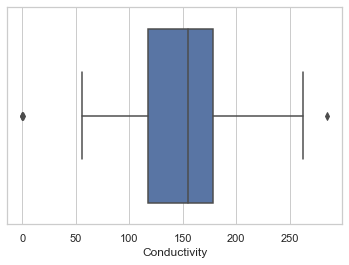

In [70]:
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x=df['Conductivity'])

<AxesSubplot:xlabel='Turbidity'>

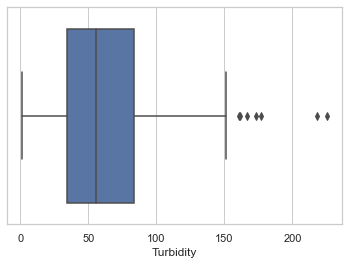

In [71]:
sns.boxplot(x=df['Turbidity'])

In [72]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(196, 8)

__Correlation Analysis__

,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month
Q,1.000000,-0.434863,-0.026219,0.043528,0.259462,0.614002,-0.032637,-0.238377
Conductivity,-0.434863,1.000000,0.443687,0.297930,-0.071290,-0.669950,0.020345,-0.011216
NO3,-0.026219,0.443687,1.000000,0.130774,0.324870,-0.276040,-0.167654,-0.440644
Temp,0.043528,0.297930,0.130774,1.000000,-0.487022,-0.527995,0.200655,-0.447506
Turbidity,0.259462,-0.071290,0.324870,-0.487022,1.000000,0.325149,0.028066,0.224818
Level,0.614002,-0.669950,-0.276040,-0.527995,0.325149,1.000000,-0.264724,-0.093135
Dayofweek,-0.032637,0.020345,-0.167654,0.200655,0.028066,-0.264724,1.000000,0.196628
Month,-0.238377,-0.011216,-0.440644,-0.447506,0.224818,-0.093135,0.196628,1.000000


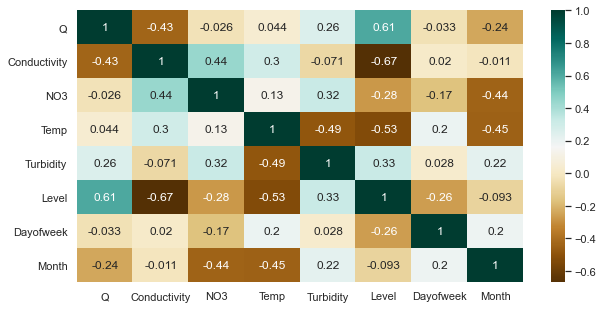

In [92]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

We can observe in the heatmap that some of the variables show a coefficient of ~0.6 or -0.4, but most of them display a very low correlation coefficient. So we can conclude that there is no strong linear correlation between our variables.

**Conductivity**:- A higher conductivity value indicates that there are more chemicals dissolved in the water. Conductivity measures the water's ability to conduct electricity, Because dissolved salts and other inorganic chemicals conduct electrical current, conductivity increases as salinity increases.

**Turbidity** :-Material that causes water to be turbid include clay, silt, very tiny inorganic and organic matter, algae, dissolved colored organic compounds, and plankton and other microscopic organisms. Turbidity makes water cloudy or opaque.

**Temperature**:- A critical water quality and environmental parameter because it governs the kinds and types of aquatic life, regulates the maximum dissolved oxygen concentration of the water, and influences the rate of chemical and biological reactions.Water between 50 and 72 degrees allows our bodies to rehydrate faster because it is absorbed more quickly

**NO3** :-Nitrate is a common contaminant found in groundwater that can have serious health effects if consumed at high levels. Nitrate is colorless, odorless and tasteless. Low levels of naturally occurring nitrate can be normal, but excess amounts can pollute groundwater

**Water level**:- Water level is also known as gauge height or stage, is the elevation of the free surface of a sea, stream, lake or reservoir relative to a specified vertical datum.the TDS level between 50-150 is considered as the most suitable and acceptable. Is Low TDS level bad or harmful for health? If the TDS level is about 1000 PPM, it is unsafe and unfit for human consumption.

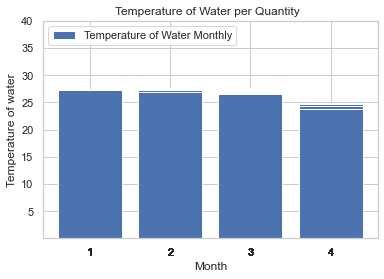

In [112]:
Month  = df ['Month']
Temperature  = df ['Temp']
plt.bar(Month,Temperature,label = 'Temperature of Water Monthly')
plt.xlabel('Month')
plt.ylabel('Temperature of water')
plt.legend(loc='upper left')
plt.title('Temperature of Water per Quantity  ')
plt.xticks(monthList)
plt.yticks([5, 10, 15, 20,25,30,35,40])
plt.show()

**Temperature** :- Water that is at 16ºC, such as cool tap water, is considered to be the most optimal for hydration. Water between 50 and 72 degrees allows our bodies to rehydrate faster because it is absorbed more quickly. Here, we can see that temperature is between 14-28 degrees. So, the temperature is pretty normal and it is drinkable.

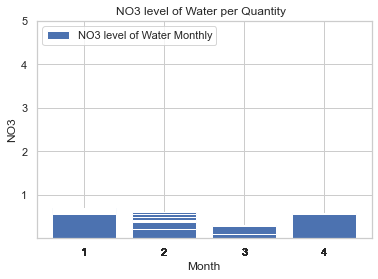

In [119]:
Month  = df ['Month']
NO3 = df ['NO3']
plt.bar(Month,NO3,label = 'NO3 level of Water Monthly')
plt.xlabel('Month')
plt.ylabel('NO3')
plt.legend(loc='upper left')
plt.title('NO3 level of Water per Quantity  ')
plt.xticks(monthList)
plt.yticks([1, 2, 3, 4,5])
plt.show()

**Nitrate**:- Standard for nitrate in drinking water is 10 milligrams of nitrate (measured as nitrogen) per liter of drinking water (mg/L).Drinking water with levels of nitrate at or below 10 mg/L is considered safe for everyone.So here we can see that the nitrate level is below 10 mg/l per monthly, so therefore the water is drinkable.

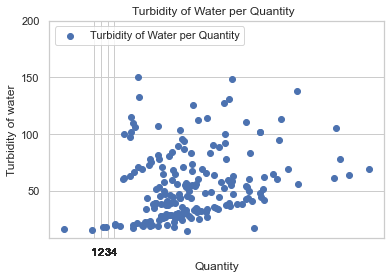

In [102]:
Quantity  = df ['Q']
Turbidity  = df ['Turbidity']
plt.scatter(Quantity,Turbidity,label = 'Turbidity of Water per Quantity')
plt.xlabel('Quantity')
plt.ylabel('Turbidity of water')
plt.legend(loc='upper left')
plt.title('Turbidity of Water per Quantity  ')
plt.xticks(monthList)
plt.yticks([50, 100, 150, 200])
plt.show()

**Turbidity**:- Drinking water should have less than 5 NTU, preferably less than 1 NTU and ideally below 0.1 NTU. But over here we can see that the turbidity level is pretty high .Turbidity more than 5 NTU can be visible to the average person while turbidity in muddy water, it exceeds 100 NTU. Groundwater normally has very low turbidity because of the natural filtration that occurs as the water penetrates through the soil. So, the water is not drinkable.

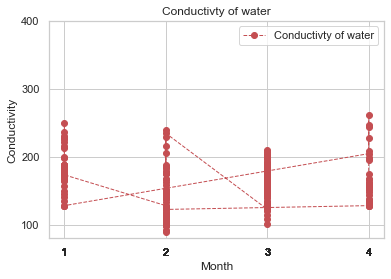

In [106]:
Conductivity = df ['Conductivity']
Month= df ['Month']

plt.plot(Month, Conductivity, label = 'Conductivty of water', 
      color='r', marker='o', linestyle='--', linewidth=1)
      
plt.xlabel('Month')
plt.ylabel('Conductivity')
plt.legend()
plt.title('Conductivty of water')
plt.xticks(Month)
plt.yticks([100, 200, 300, 400])
plt.show()

**Conductivity**:-EC value should not exceeded 400 μS/cm.So we can conlude that Conductivity vise it is pretty good on the monthly basis and water is drinkable.

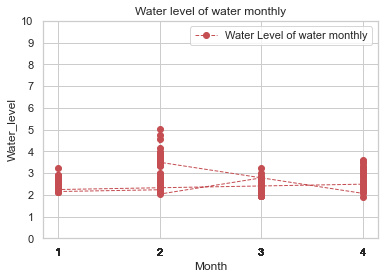

In [126]:
Water_level = df ['Level']
Month = df ['Month']

plt.plot(Month, Water_level, label = 'Water Level of water monthly', 
      color='r', marker='o', linestyle='--', linewidth=1)
      
plt.xlabel('Month')
plt.ylabel('Water_level')
plt.legend()
plt.title('Water level of water monthly')
plt.xticks(Month)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.show()

**Water level** :-Water level is also known as gauge height or stage, is the elevation of the free surface of a sea, stream, lake or reservoir relative to a specified vertical datum.the TDS level between 50-150 is considered as the most suitable and acceptable. So, here we can conclude that the water level is pretty low and it is drinkable. 

__Conclusion__

By this we can infer that the water quality of the Scorbellos road in Australia receives pretty good quality of water but the improvement can be made in the turbidity of the water. Other factors of the water are pretty ideal for drinking.

_Thank You /_